In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
def plot_csv_data(file_path):
    # Leggi il file CSV utilizzando Pandas
    data = pd.read_csv(file_path)

    # Estrai i dati dalle colonne
    x_data = data.iloc[:, 0]
    y_data = data.iloc[:, 1]

    # Plotta i dati
    plt.plot(x_data, y_data)
    plt.xlabel('Number of MPI Tasks')
    plt.ylabel('Execution Time (s)')
    plt.title('Plot of CSV Data')
    plt.grid(True)
    plt.show()

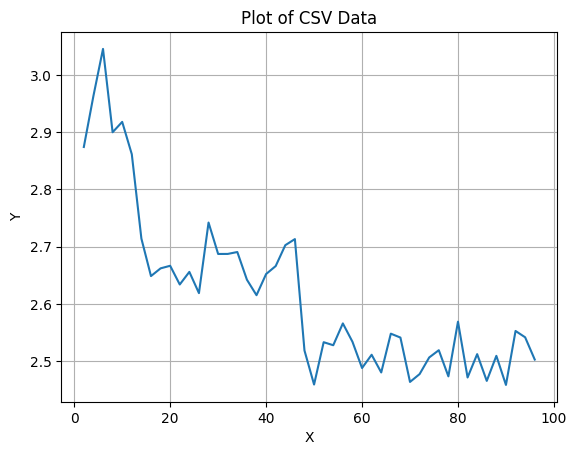

In [5]:
# Path al tuo file CSV
file_path = 'execution_times_mpi.csv'
plot_csv_data(file_path)